In [51]:
import numpy as np 
import pandas as pd 

In [52]:

#list of possible encodings to try 
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv' # change this to the path of your csv file 

# Attempt to read the CSV file with different encodings 
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break #stop the loop
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue #try the next encoding 

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else: 
    print("All encoding attempts failed. unable to read CSV file.")
    

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [53]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
25,ham,Just forced myself to eat a slice. I'm really ...,NaN,NaN,NaN
2750,ham,Ok but tell me half an hr b4 u come i need 2 p...,NaN,NaN,NaN
170,ham,"Sir, I need AXIS BANK account no and bank addr...",NaN,NaN,NaN
2295,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...,NaN,NaN,NaN
1748,ham,Feel Yourself That You Are Always Happy.. Slow...,NaN,NaN,NaN


In [54]:
df.shape

(5572, 5)

In [55]:
# 1. data cleaning 
# 2. EDA 
# 3. Text Preprocessing 
# 4. Model building 
# 5. Evalution 
# 6. Improvement
# 7. Website
# 8. Deploy

In [56]:
### 1.data cleaning

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
# drop last 3 unnamed cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [59]:
df.sample(5)

,v1,v2
3748,spam,Dear Voucher Holder 2 claim your 1st class air...
2674,ham,I am 6 ft. We will be a good combination!
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...
3530,ham,Prepare to be pounded every night...
2061,ham,Hey ! I want you ! I crave you ! I miss you ! ...


In [60]:
#renaming cols 
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2941,ham,"Hello. No news on job, they are making me wait..."
3223,ham,Sorry da thangam.it's my mistake.
5,spam,FreeMsg Hey there darling it's been 3 week's n...
4647,ham,We are okay. Going to sleep now. Later
2935,ham,And stop wondering \wow is she ever going to s...


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
df['target'] = encoder.fit_transform(df['target'])

In [63]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [65]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [67]:
#check for duplicates values
df.duplicated().sum()

403

In [68]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [69]:
df.duplicated().sum()

0

In [70]:
df.shape

(5169, 2)

In [71]:
##eda expolatry data analysis

In [72]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13322c17ad0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

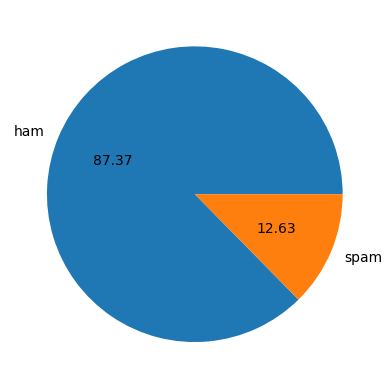

In [74]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f')

In [75]:
# we can see here that ham is very big that spam 

In [76]:
import nltk

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nooro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
df['num_characters'] = df['text'].apply(len) #number of char

In [79]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [80]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

In [81]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [82]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [83]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [84]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [85]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
# targeting ham 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
# targeting spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [88]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

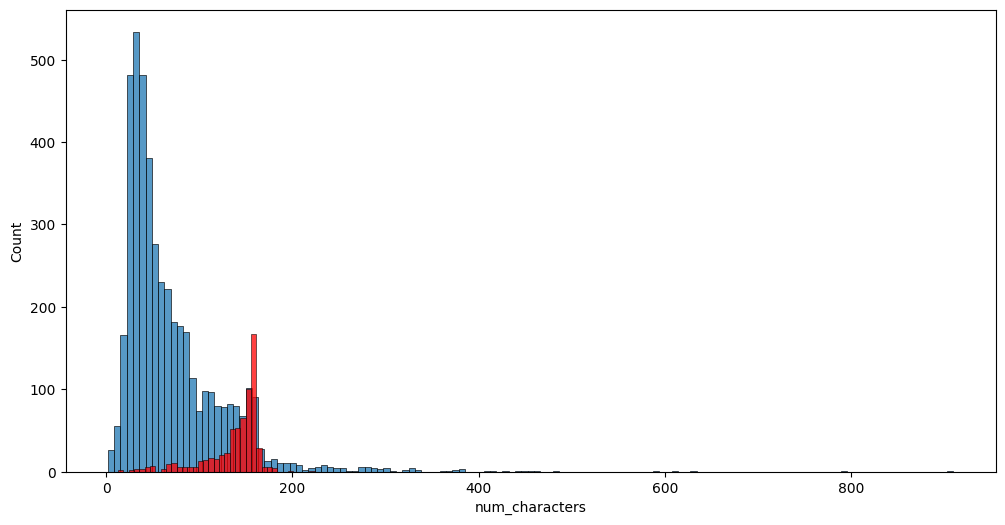

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']) #ham number of char
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') #spam number of char


<Axes: xlabel='num_words', ylabel='Count'>

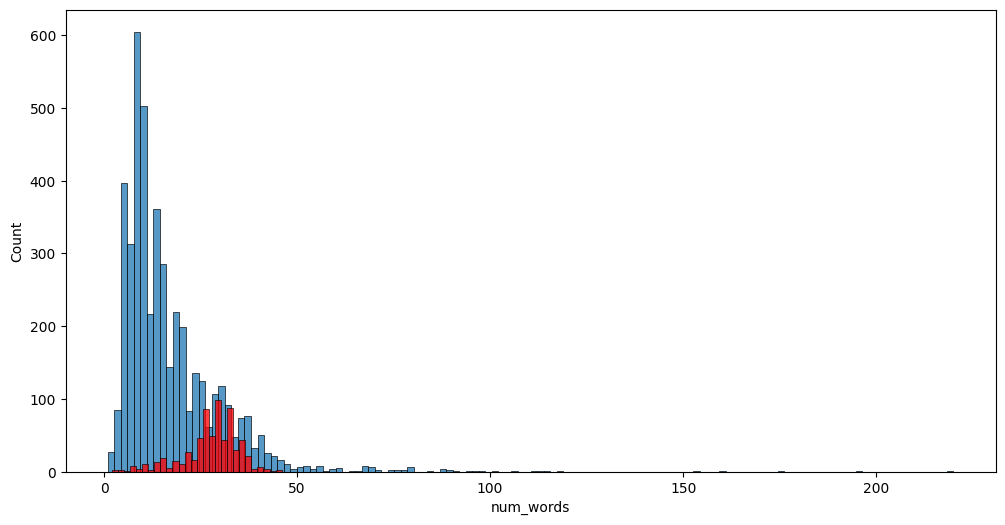

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham number of words
sns.histplot(df[df['target'] == 1]['num_words'], color='red') #spam number of words


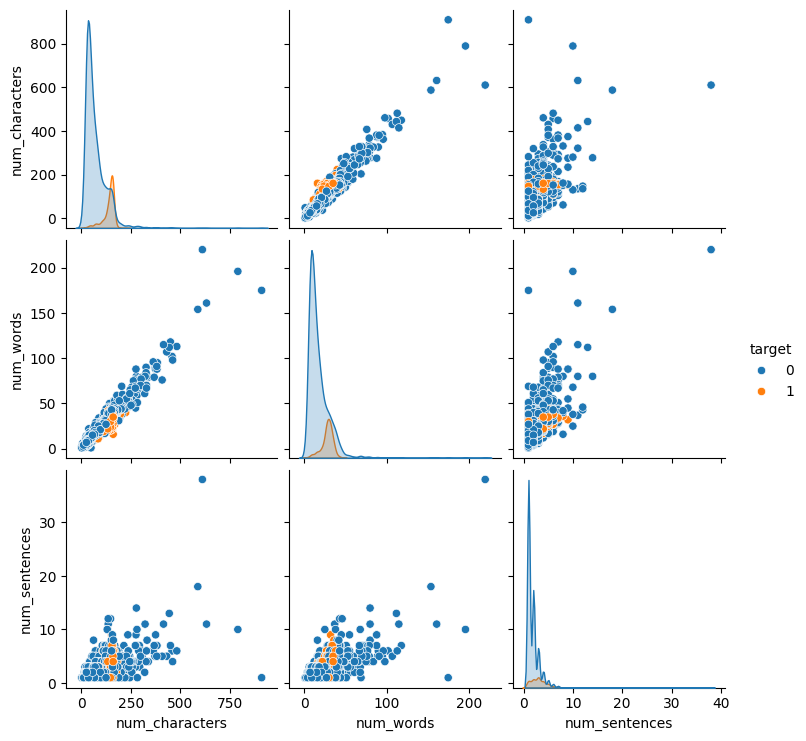

In [91]:
sns.pairplot(df, hue='target')

In [93]:
# sns.heatmap(df.corr(),annot=True)

### Data Preprocessing 
-Lower case 
-Tokenization 
-Removing special characters 
-Removing stop words and punctution 
-stemming

In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text: 
        if i.isalnum():
            y.append(i)

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

transformed_text = transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

print(transformed_text)

until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat 'go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nooro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [96]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [97]:
df['transformed_text'] = df['text'].apply(transform_text)

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [100]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

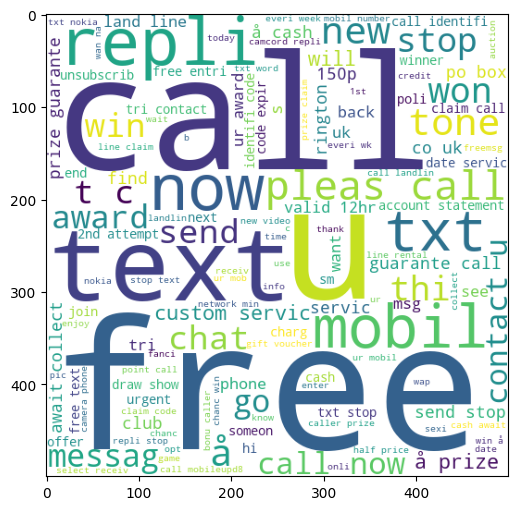

In [101]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [104]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

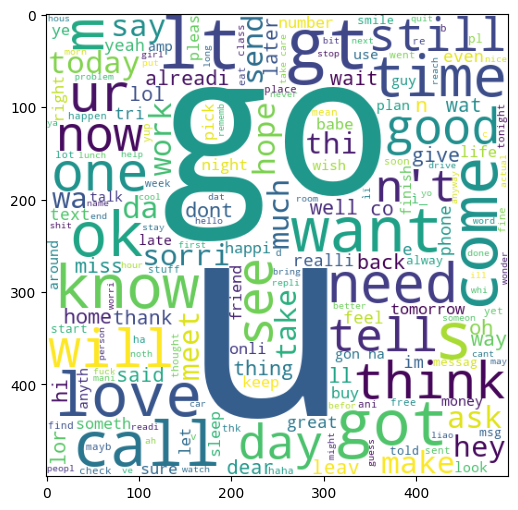

In [105]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [109]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [110]:
len(spam_corpus)

25558

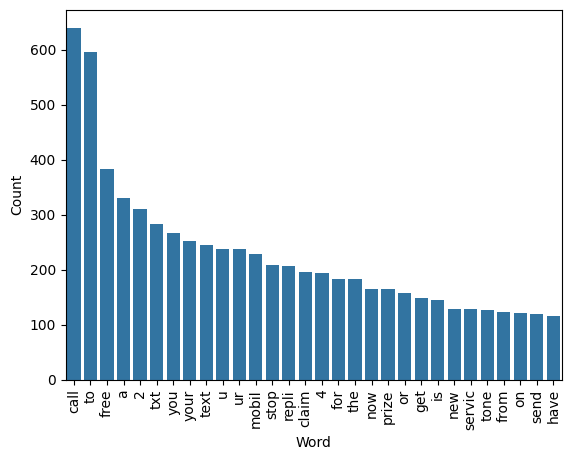

In [112]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show

# Assuming spam_corpus is your list of text data

# Count the occurrences of each item in spam_corpus
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [113]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [114]:
len(ham_corpus)

102706

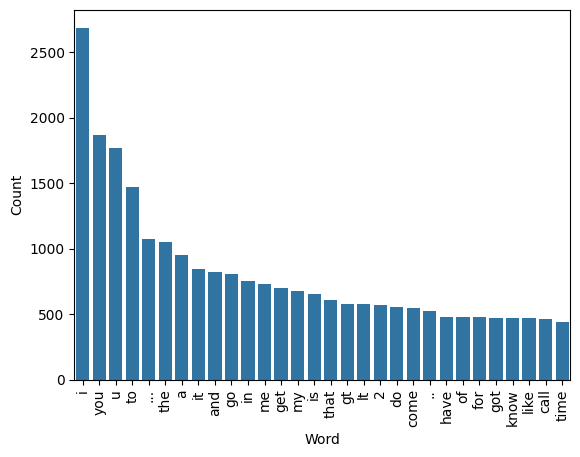

In [115]:
# Assuming spam_corpus is your list of text data

# Count the occurrences of each item in spam_corpus
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


### 4.building the model 